In [ ]:
# This page uses the generated .txt datafile and trains up a machine learning model

# Random Forest Confusion Matrix

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import pickle

In [9]:
%%time
features = []
classifier = RandomForestClassifier(random_state = 42, n_jobs=-1, n_estimators=100, max_depth=10, oob_score=False)
data= pd.read_csv('data_file.txt')
y = data['Solution']
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10,stratify=y)
classifier1 = classifier.fit(X_train.values, y_train.values)
predicted= classifier1.predict(X_test.values)
cm = confusion_matrix(y_test, predicted, labels=classifier1.classes_)
print(classifier1.classes_)
print('Confusion Matrix :')
print(cm)
print('Accuracy Score :',accuracy_score(y_test,predicted))
print('Report :')
print(classification_report(y_test, predicted))
pcts = []
for i in range(len(cm)):
    total = sum(cm[i])
    pcts.append([])
    for j in range(len(cm[i])):
        val = cm[i][j]*100/total
        pcts[i].append(round(val,2))
print(pcts)

['Baby Powder' 'Background' 'Baking Powder' 'Confidence Check'
 'Hot Shot Confidence Check' 'Pineapple Gelatin' 'Red Star Yeast'
 'Tumeric']
Confusion Matrix :
[[51  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 40  0  0  3  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 74  0  0  0]
 [ 0  0  0  0  0 51  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 47]]
Accuracy Score : 0.9921875
Report :
                           precision    recall  f1-score   support

              Baby Powder       1.00      1.00      1.00        51
               Background       1.00      1.00      1.00        17
            Baking Powder       1.00      0.93      0.96        43
         Confidence Check       1.00      1.00      1.00        81
Hot Shot Confidence Check       1.00      1.00      1.00        74
        Pineapple Gelatin       0.94      1.00      0.97        51
           Red Star Yeast       1.00      1.00      1.00        20
                  Tumeric       1.00      1.00    

In [10]:
save_file = 'Models/model.sav'
pickle.dump(classifier1, open(save_file,'wb'))

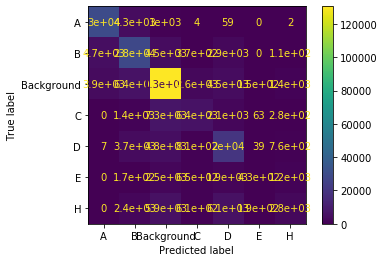

In [5]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [6]:
def CM(file_name):
    # Load in the data file
    data= pd.read_csv(file_name)
    y = data['Solution']
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10,stratify=y)
    classifier1 = classifier.fit(X_train, y_train)
    predicted= classifier1.predict(X_test)
    cm = confusion_matrix(y_test, predicted, labels=classifier1.classes_)
    print(classifier1.classes_)
    print('Confusion Matrix :')
    print(cm)
    print('Accuracy Score :',accuracy_score(y_test,predicted))
    print('Report :')
    print(classification_report(y_test, predicted))
    pcts = []
    for i in range(len(cm)):
        total = sum(cm[i])
        pcts.append([])
        for j in range(len(cm[i])):
            val = cm[i][j]*100/total
            pcts[i].append(round(val,2))
    print(pcts)
    save_file = 'Models/model.sav'
    pickle.dump(classifier, open(save_file,'wb'))

In [8]:
CM('data_file.txt')

['Background' 'Cal. Soln' 'Conf. Check' 'EH' 'Wet_BG' 'YG. Soln'
 'wet baking powder' 'wet flour' 'wet milk powder' 'wet niacin'
 'wet pineapple gelatin' 'wet red star yeast']
Confusion Matrix :
[[  348     0    19     0     0     0     3     0     7     0     0     0]
 [    0   466     0     0     0     0     0     0     0     0     0     0]
 [   15     0  1760     0     0     0     7     3     4     1     9     0]
 [    0     0     0 20111    19     0     0     0     0     0     0     0]
 [    0     0     0   400  3174     0     0     0     0     0     0     0]
 [    1     0     0     0     0   199     0     0     0     0     0     0]
 [    0     0     1     0     0     0   424    23     0     2   113     3]
 [    0     0     1     0     0     0    12   438     0     0     0    16]
 [    3     0     1     0     0     0     0     0   685     0     0     0]
 [    3     0     0     0     0     0     2     1     1   369     0     0]
 [    0     0     1     0     0     0    37    18     0

# Harman's RF to optimize parameters

In [128]:
# if you want a model with optimized parameters

In [146]:
rf = RandomForestClassifier(n_jobs=-1)

In [147]:
params = {
    'max_depth': [5,10,15,20,30,40,50,60,80,100],
    'min_samples_leaf': [2,3,4,5,10],
    'n_estimators': [50,100,200,300,400,500,750,1000]
}

In [148]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [149]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  1.0min
/home/griffin/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1178 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 19.2min finished


CPU times: user 18.9 s, sys: 2.8 s, total: 21.7 s
Wall time: 19min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [150]:
classifier = grid_search.best_estimator_

In [159]:
classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)